In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.1'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'

In [33]:
data = np.random.randn(1000)

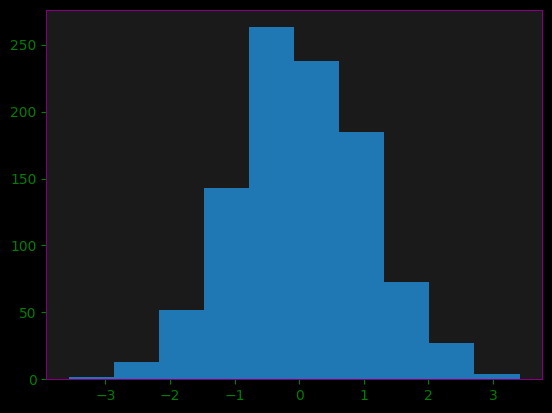

In [34]:
a = plt.hist(data)

In [35]:
a

(array([  2.,  13.,  52., 143., 263., 238., 185.,  73.,  27.,   4.]),
 array([-3.57034184, -2.87203604, -2.17373024, -1.47542445, -0.77711865,
        -0.07881285,  0.61949295,  1.31779875,  2.01610454,  2.71441034,
         3.41271614]),
 <BarContainer object of 10 artists>)

In [141]:
bins, edges = np.histogram(data)
bins, edges

(array([  2,  13,  52, 143, 263, 238, 185,  73,  27,   4], dtype=int64),
 array([-3.57034184, -2.87203604, -2.17373024, -1.47542445, -0.77711865,
        -0.07881285,  0.61949295,  1.31779875,  2.01610454,  2.71441034,
         3.41271614]))

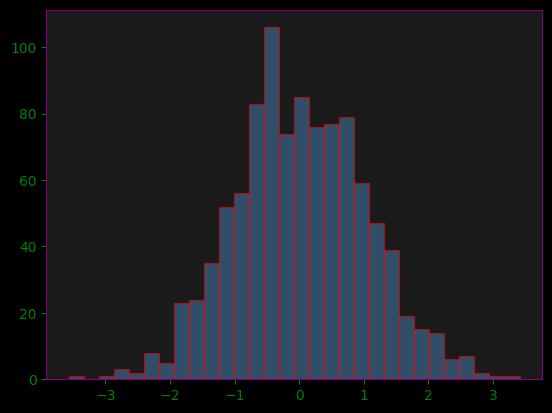

In [52]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='bar', color='steelblue',
         edgecolor='red');

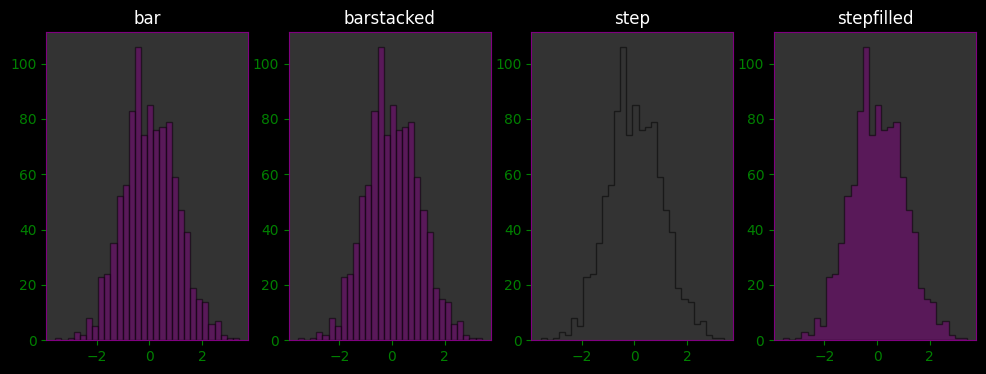

In [59]:
fig = plt.figure(figsize=(12,4))

ax1, ax2, ax3, ax4 = [fig.add_subplot(1,4,i) for i in range(1,5)]
types = ['bar', 'barstacked', 'step', 'stepfilled']

for ax, type_ in zip((ax1,ax2,ax3,ax4),types):
    ax.set_facecolor('.2')
    ax.set_title(type_)
    ax.hist(data, bins=30, alpha=0.5,
            histtype=type_, color='purple',
            edgecolor='black');
    

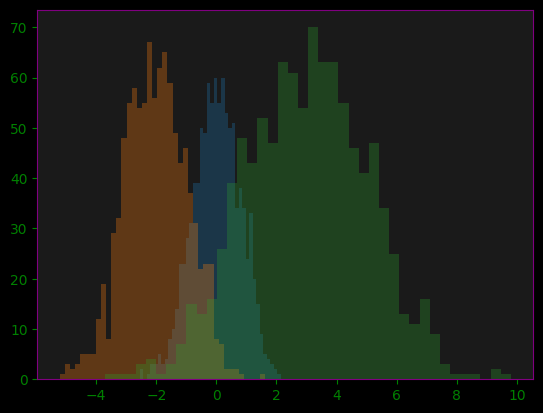

In [111]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
kwargs_ = {'histtype':'stepfilled', 'alpha':0.3, 'bins':40}

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

------------------------

In [166]:
mean = [0, 0]

cov = [[1, 1], 
       [1, 2]]

np.random.multivariate_normal(mean, cov, 10)

array([[ 0.42843239,  0.10856707],
       [-1.78587257, -1.47086619],
       [ 0.21098106,  1.28611662],
       [ 0.0410156 , -1.15895859],
       [-0.96380134, -1.35440754],
       [ 0.57452162,  1.35160159],
       [ 0.86301552,  2.15700016],
       [-1.01392236, -2.53747526],
       [ 0.49373373,  0.57713458],
       [-0.05059246, -0.30308861]])

In [167]:
X = np.random.multivariate_normal(mean, cov, 10000)

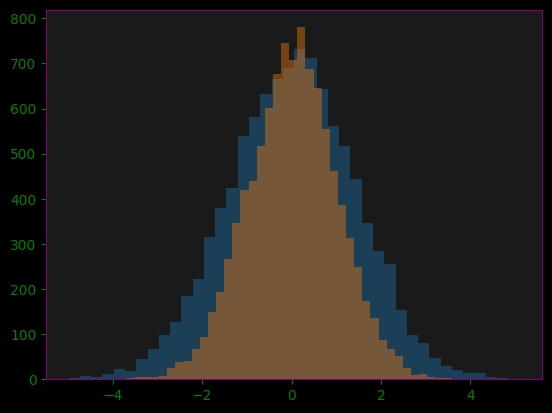

In [168]:
kwargs = {'histtype':'stepfilled', 'alpha':0.4, 'bins':40}

plt.hist(X[:,1], **kwargs)
plt.hist(X[:,0], **kwargs);

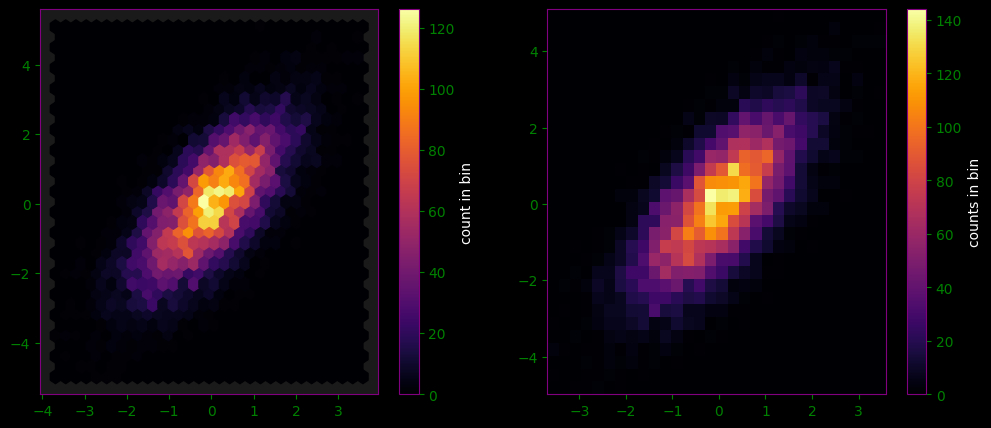

In [169]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hexbin(X[:,0], X[:,1], gridsize=30, cmap='inferno')
cb = plt.colorbar(label='count in bin')

plt.subplot(1,2,2)
plt.hist2d(X[:,0], X[:,1], bins=30, cmap='inferno')
cb = plt.colorbar()
cb.set_label('counts in bin')

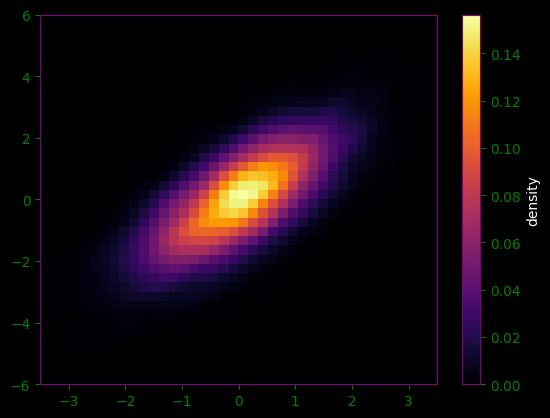

In [171]:
from scipy.stats import gaussian_kde

data = X.T

kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='inferno')
cb = plt.colorbar()
cb.set_label("density")

In [176]:
Z.shape

(1600,)

In [177]:
counts, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins=30)